<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Прочитаем данные

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
import warnings

warnings.simplefilter('ignore')


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [78]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [79]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [80]:
data.duplicated().sum()

0

### Вывод

**Проблемки:**  
first_day_exposition - должен быть тип datetime  
ceiling_height - есть пропущенные значения  
floors_total - должен быть тип int, т.к. количество этажей - целое значение, а так же пропущенные значения  
is_apartment - должен быть тип bool, а так же пропущенные значения  
living_area - пропущенные значения  
kitchen_area - пропущенные значения  
balcony - пропущенные значения  
locality_name - пропущенные значения  
airports_nearest - пропущенные значения  
cityCenters_nearest - пропущенные значения  
parks_around3000 - тип должен быть int, а так же пропущенные значения  
parks_nearest - пропущенные значения  
ponds_around3000 - тип должен быть int, а так же пропущенные значения  
ponds_nearest - пропущенные значения  
days_exposition - тип должен быть int, а так же пропущенные значения

## Предобработка данных

Изменяем тип на целые числа

In [81]:
data['last_price'] = data['last_price'].astype(int)

Меняем тип данных на даты

In [82]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Заменяем проаущенные значения в аппартаментах на False, скорее всего человек увидел  вопрос "у вас аппартаменты" и зная что у него квартира, просто пропустил данный вопрос

In [83]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

Нет балкона, парков и пруда - нет проблем, меняем на 0

In [84]:
data['balcony'] = data['balcony'].fillna(value=0).astype(int)

In [85]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)
data['parks_nearest'] = data['parks_nearest'].fillna(value=0).astype(int)

In [86]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)
data['ponds_nearest'] = data['ponds_nearest'].fillna(value=0).astype(int)

```python

columns = [col1, col2, col3]

for i in columns:
    df[i] = df[i].fillna(0)

```

Ввиду малого числа пропущенных значений в названии нас. пункта и общей этажности здания и невозможности их корректно заполнить - все сносим

In [87]:
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

Оставшаяся этажность - к целым числам

In [88]:
data['floors_total'] = data['floors_total'].astype(int)

Пропущенные значения высоты потолка заполним медианным значением

In [89]:
data['ceiling_height'] = data.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

Высчитываем пропущенные значения в жилой площади и плозади кухонь

In [91]:
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

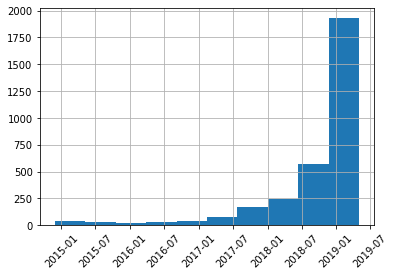

In [92]:
data[data['days_exposition'].isna()]['first_day_exposition'].hist(xrot=45)
plt.show()

Скорее всего пропущенные значения в days_explosioin - это квартиры которые еще продаются

In [93]:
data.isnull().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5524
cityCenters_nearest     5501
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3171
dtype: int64

## Расчёты и добавление результатов в таблицу

Посчитаем стоимость квадратного метра и сразу сделаем его целым числом

In [94]:
data['sm_price'] = data['last_price'] / data['total_area']
data['sm_price'] = data['sm_price'].astype(int)

добавим столбцы дней недели, месяце и годов

In [95]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Обзовем этаж первым, последним и остальными

In [96]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

Добавим стоблцы соотношения жилой прощади к общей и кухни к общей площади

In [97]:
data['area_ratio'] = data['living_area'] / data['total_area'] * 100
data['area_ratio'] = data['area_ratio'].fillna(value=0).astype(int)

In [98]:
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area'] * 100
data['kitchen_ratio'] = data['kitchen_ratio'].fillna(value=0).astype(int)

## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

Визуализирум площадь квартир

<div class="alert alert-info"> <b>Постарался изобразить функцию, работает</b></div>

In [99]:
def histing(df, column, title):
    d = df[column].describe()
    r1 = d['25%'] - 3 * (d['75%'] - d['25%'])
    r2 = d['25%'] + 5 * (d['75%'] - d['25%'])
    if r1 < 0: r1 = 0 
    df[column].plot(kind='hist', bins=30, range=(r1, r2), grid=True, title=title, figsize=(10,5), legend=True)

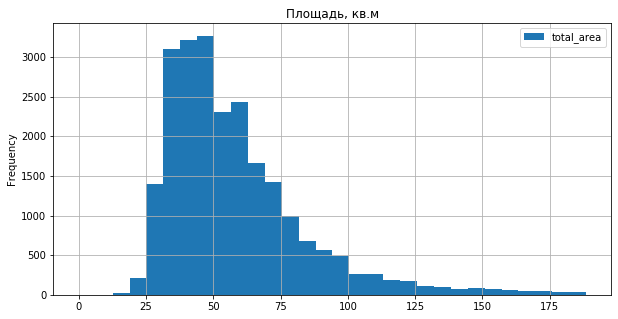

In [100]:
histing(data, 'total_area', 'Площадь, кв.м')

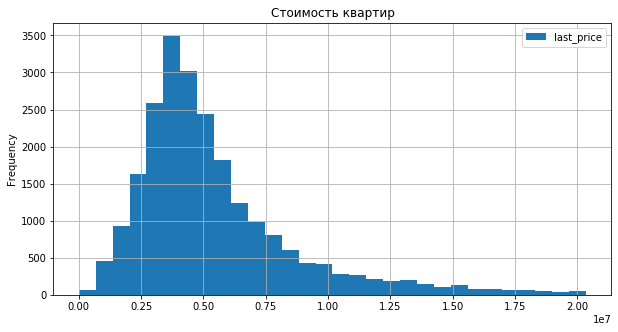

In [101]:
histing(data, 'last_price', 'Стоимость квартир')

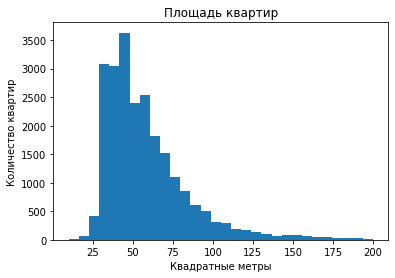

Наибольшие по площади варианты:
19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
5893     500.0
15016    500.0
12401    495.0
Name: total_area, dtype: float64


In [102]:
plt.hist(data['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(data['total_area'].sort_values(ascending=False).head(10))

Посмотрм на стоимость квартир

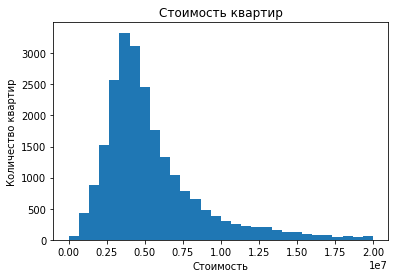

Наибольшие по цене варианты:
12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
22831    289238400
16461    245000000
13749    240000000
5893     230000000
8900     190870000
Name: last_price, dtype: int64


In [103]:
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене варианты:')
print(data['last_price'].sort_values(ascending=False).head(10))

Посмотрим на количество комнат в квартирах

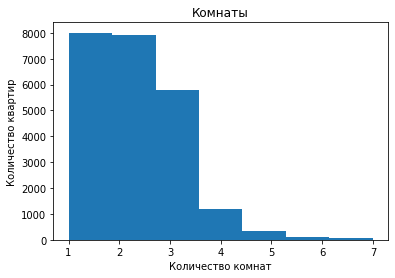

Наибольшие по числу комнат варианты:
14498    19
18848    16
5358     15
20829    14
866      14
19540    12
9688     11
648      11
18119    10
18891    10
Name: rooms, dtype: int64


In [104]:
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по числу комнат варианты:')
print(data['rooms'].sort_values(ascending=False).head(10))

Работа с потолками

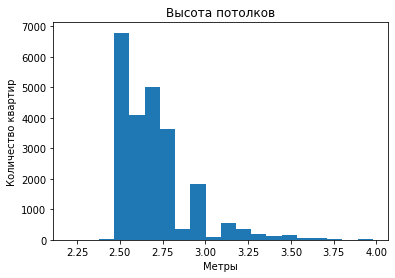

Наибольшие по высоте потолков варианты:
22869    100.0
3148      32.0
22336     32.0
21377     27.5
5246      27.0
10773     27.0
21824     27.0
5807      27.0
22938     27.0
4876      27.0
Name: ceiling_height, dtype: float64


In [105]:
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков варианты:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))

Площади кухни

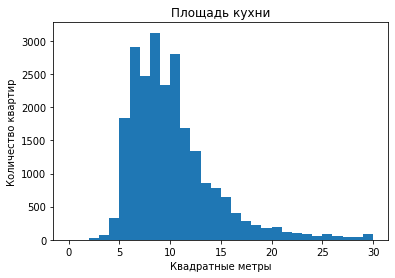

Наибольшие по площади кухни варианты:
19540    112.000000
20215    107.000000
2489     100.700000
5358     100.000000
16239     93.200000
16797     93.000000
15016     87.537299
10867     87.200000
9826      86.504359
4394      77.000000
Name: kitchen_area, dtype: float64


In [106]:
plt.hist(data['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади кухни варианты:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))

Жилая прощадь

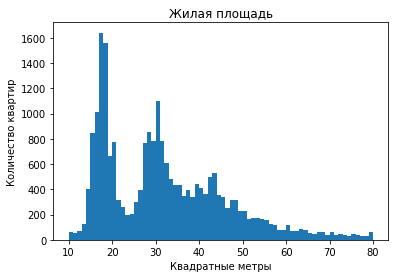

Наибольшие по жилой площади варианты:
19540    409.700000
5358     409.000000
3117     360.410721
12401    347.500000
4237     332.000000
12859    322.300000
660      312.500000
8018     301.500000
14088    300.000000
5893     285.586942
Name: living_area, dtype: float64


In [107]:
plt.hist(data['living_area'], bins=70, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по жилой площади варианты:')
print(data['living_area'].sort_values(ascending=False).head(10))

Посмотрим на распределение по стоимости квадратного метра

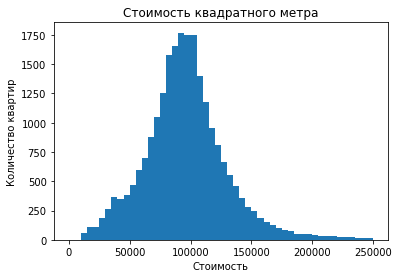

Наибольшие по цене за квадрат варианты:
12971    1907500
1436     1736842
22831    1542604
14706    1000748
4996      995983
16461     857542
4859      848484
17172     848484
16647     841379
17912     813253
Name: sm_price, dtype: int64


In [108]:
plt.hist(data['sm_price'], bins=50, range=(0,250000))
plt.title('Стоимость квадратного метра')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене за квадрат варианты:')
print(data['sm_price'].sort_values(ascending=False).head(10))

Вывод
- Площадь:
Квартиры площадью больше 75 м2 меркнут на фоне количества квартир меньшей площадью, но есть и гиганты, я бы сказал дворцы с плозади несколько сотен квадратов.
- Стоимость:
Тоже самое и прослеживается в стоимости - все смещено влево, до 8 млн собрана большая часть квартир, но те же дворцы могут стоить больше 15 миллонов.
- Комнаты:
Как и ожидалось одно, двух и трехкомнатные квартиры самые популярные, дальше - все реже и реже
- Высота потолков:
Самые популярыне потолки 2,5 метра, есть и аномалии в 100 и 30 метров, скорее всего ошибка в неправильно поставленных знаках, их число невелико 
- Площадь кухни:
от 5 до 11 - уверенные лидеры квартир Санкт-Петербурга, остальные редки или являются фантазиями домохозяек)
- Жилая площадь:
Видим 3х горбового верблюда, но не стоит боятся - эти пики показывают 1, 2 и 3 комнатные квартиры
- Стоимость квадратного метра:
Красивый график нормального распределения

2. Изучение времени продажи квартиры

Узнаем медиану и среднее в днях продажи квартир

In [109]:
print('Время продажи (медиана):', round(data.query('days_exposition')['days_exposition'].median()),'\n')
print('Время продажи (среднее):', round(data.query('days_exposition')['days_exposition'].mean()),'\n')

Время продажи (медиана): 121 

Время продажи (среднее): 193 



Гистограмма

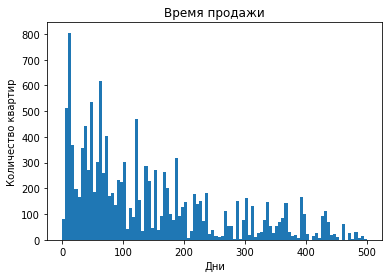

count    14480.000000
mean       193.290470
std        211.510707
min          3.000000
25%         46.000000
50%        121.000000
75%        265.000000
max       1572.000000
Name: days_exposition, dtype: float64

In [110]:

plt.hist(data.query('days_exposition')['days_exposition'], bins=100, range=(0,500))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

data.query('days_exposition')['days_exposition'].describe()

Вывод:
- Медианное время продажи 121 дней, хотя можно увидеть что много квартир почти сразу продаются, а есть прям "висяки"

3. Работа с редкими и выбивающимися значениями

Отбросим значения на основе 1,5 размаха

In [111]:
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq

list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    data[col] = quartile_range(data, col)


data['rooms'] = data['rooms'].fillna(0).astype(int)

data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sm_price,weekday,month,year,area_ratio,kitchen_ratio
count,23565.000000,2.151900e+04,22326.000000,23565.000000,21837.000000,23565.000000,22682.000000,23565.000000,22250.000000,23565.000000,...,23565.000000,23565.000000,23565.000000,18721.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,9.878421,4.837115e+06,54.319704,2.013495,2.659333,10.675875,31.526984,5.878124,9.417840,0.593677,...,167.169998,0.589900,198.738129,128.299343,9.940539e+04,2.567367,6.401570,2017.371016,56.098748,18.140208
std,5.681156,2.215774e+06,19.331030,0.986750,0.143003,6.594823,13.752739,4.871485,3.177523,0.960660,...,306.301628,0.883966,305.195521,121.064671,5.038944e+04,1.788279,3.492948,1.037393,10.108382,6.962338
min,0.000000,1.219000e+04,12.000000,0.000000,2.250000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.110000e+02,0.000000,1.000000,2014.000000,2.000000,2.000000
25%,6.000000,3.300000e+06,39.400000,1.000000,2.550000,5.000000,18.700000,2.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,41.000000,7.656600e+04,1.000000,3.000000,2017.000000,50.000000,13.000000
50%,9.000000,4.400000e+06,50.000000,2.000000,2.640000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,0.000000,0.000000,85.000000,9.500000e+04,3.000000,6.000000,2017.000000,57.000000,17.000000
75%,14.000000,6.000000e+06,65.500000,3.000000,2.750000,16.000000,40.600000,8.000000,11.000000,1.000000,...,301.000000,1.000000,389.000000,182.000000,1.142130e+05,4.000000,10.000000,2018.000000,63.000000,22.000000
max,50.000000,1.186686e+07,114.200000,5.000000,3.050000,60.000000,76.700000,33.000000,19.450000,5.000000,...,3190.000000,3.000000,1344.000000,509.000000,1.907500e+06,6.000000,12.000000,2019.000000,100.000000,78.000000


Вывод
В датафрейме отброшены значения на основе 1.5 размаха.

4. Определение факторов, влияющих на стоимость квартиры

Посмотрим на зависимость цены и площади:

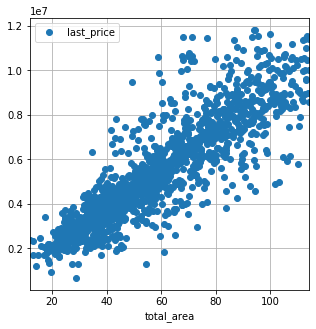

Корреляция цены и площади: 

            last_price  total_area
last_price    1.000000    0.905372
total_area    0.905372    1.000000 



In [112]:
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')


Зависимость цены от комнат:

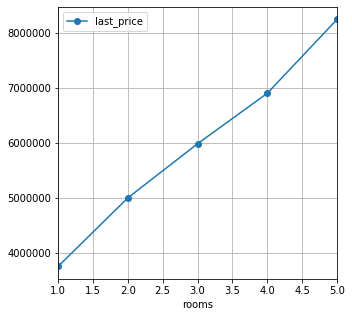

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000  0.537551
rooms         0.537551  1.000000 



In [113]:
(
    data.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

Зависимость цены квартиры и удаленностью от центра:

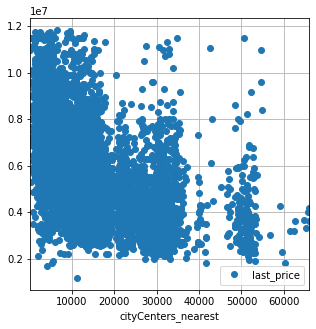

Корреляция цены и удалённости от центра: 

                     cityCenters_nearest  last_price
cityCenters_nearest             1.000000    0.712077
last_price                      0.712077    1.000000 



In [114]:
(
    data.pivot_table(index='cityCenters_nearest', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(data.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr(),'\n')

Влияет ли этаж на стоимость

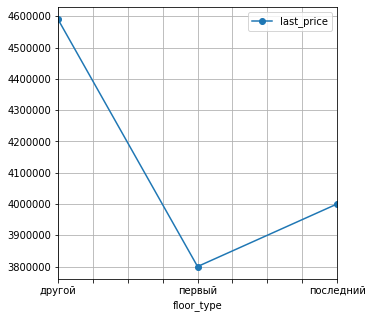

In [115]:
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Зависимость цены от общей площади:

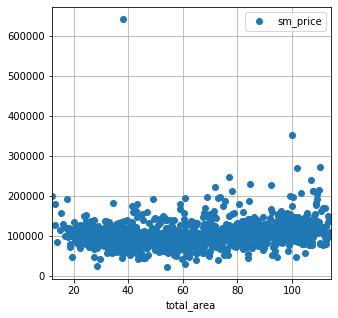

Корреляция цены за квадрат и площади: 

            sm_price  total_area
sm_price    1.000000    0.047401
total_area  0.047401    1.000000 



In [116]:
(
    data.pivot_table(index='total_area', values='sm_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'sm_price']).corr(),'\n')

Зависимость цены м2 от колличества комнат:

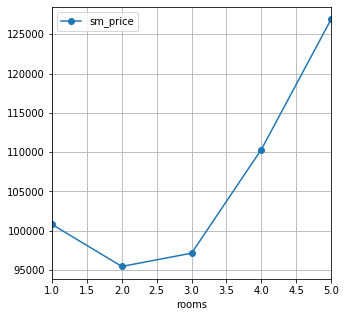

Корреляция цены за квадрат и числа комнат: 

             rooms  sm_price
rooms     1.000000 -0.263158
sm_price -0.263158  1.000000 



In [117]:
(
    data.query('rooms > 0').pivot_table(index='rooms', values='sm_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'sm_price']).corr(),'\n')

In [118]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sm_price,weekday,month,year,floor_type,area_ratio,kitchen_ratio
0,20,NaN,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755,NaN,120370,3,3,2019,другой,47,23
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,0,81.0,82920,1,12,2018,первый,46,27
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.3,4,False,...,2,574,NaN,92785,3,8,2015,другой,61,14
3,0,NaN,NaN,2015-07-24,3,2.60,14,NaN,9,False,...,3,234,424.0,408176,4,7,2015,другой,57,17
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48,121.0,100000,1,6,2018,другой,32,41


Зависимость от дня:

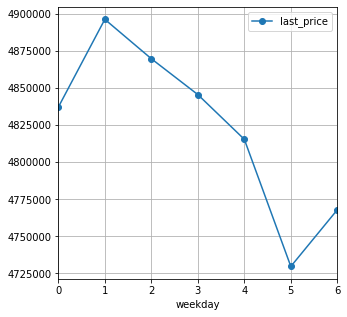

In [119]:
(
    data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Зависимость от месяца:

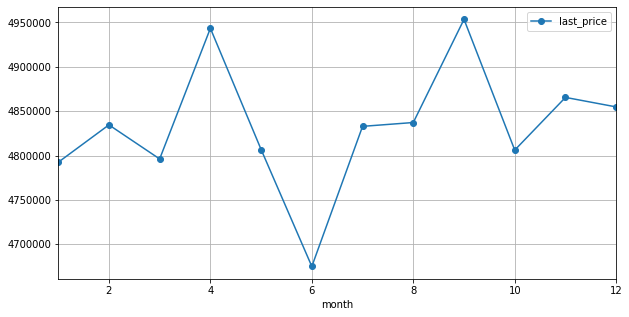

In [120]:
(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()

Зависимость от года:

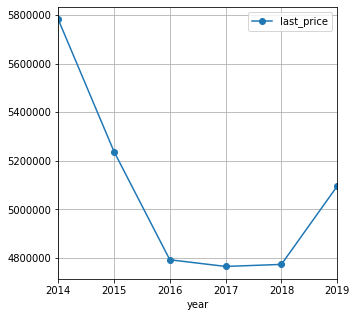

In [121]:
(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Вывод:
- Прямая зависимоть цены и площади, тут все логично.
- Чем больше комнат, тем больше площадь, тем дорое стоимость квартиры, логично.
- Как бы не казалось странным, но чем ближе к центру - тем есть дороже квартиры, логика!)
- Первые и последние этажи дешевле, видимо не всем нравятся крики и текущая крыша.
- Стоимость м2 не сильно зависит от общей площади, этакий "люля-кебаб стоимостей м2" над тлеющими углями "площадей квартиры"
- Самая низкая стоимость м2 у 2-3 комнатных квартир, как не самые популярные варианты. Однушки более ликвидны, цена м2 выше, а 4-5 и больше многокомнатные квартиры - видимо там уже совсем другой класс квартир.  

Зависимость от времени:
- Лучше все делать в будний день, и многие из графика согласны с этим.
- Летом мервый сезон, есть всплески весной и осенью, в остальное время стабильно.
- События 2014 года пошатнули экономику, но после 18 года начался уверенный рост.

5. Сравнение средней стоимости квадратного метра в топ-10 городов

In [122]:
city_ten = data['locality_name'].value_counts().head(10)
city_sm_price = data.query('locality_name in (@city_ten.index)').pivot_table(values='sm_price', index='locality_name')
city_sm_price = city_sm_price.astype(int)
city_sm_price.sort_values('sm_price', ascending=False)

,sm_price
locality_name,
Санкт-Петербург,114868
Пушкин,103125
деревня Кудрово,92473
посёлок Парголово,90175
посёлок Мурино,85672
посёлок Шушары,78550
Колпино,75424
Гатчина,68745
Всеволожск,68654


**Вывод**
- Логично что Спб будет самым с самым дорогим квадратным метром, а почти все остальное - по сути это пригород Спб, отдаленные районы. Только Выборг отличается своей удаленность от Санкт-Петербурга.

6. Определяем границу центральной зоны


Сделаем столбец в км до центра, для удобства.

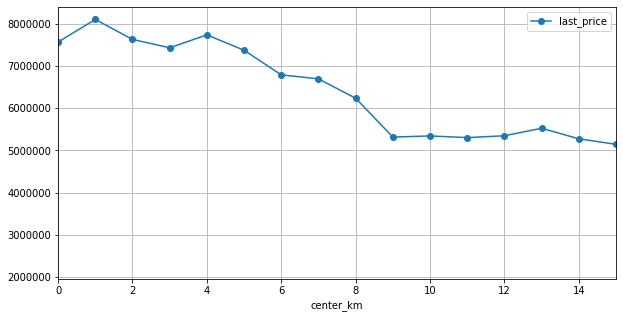

In [123]:
data['center_km'] = data['cityCenters_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(value=0).astype(int)
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='center_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.show()

**Вывод**
- После 8 км цена резко пошла вниз, наверное там и будет граница "центральности" Спб.

7. Анализ сегмента в центре

In [44]:
spb_center = data.query('(locality_name == "Санкт-Петербург") & (center_km <= 8)')

print('Площадь в СПБ(медиана):', round(data.query('locality_name == "Санкт-Петербург"')['total_area'].median()),'\n')
print('Площадь в центре СПБ (медиана):', round(spb_center['total_area'].median()),'\n')
print('Площадь в СПБ(среднее):', round(data.query('locality_name == "Санкт-Петербург"')['total_area'].mean()),'\n')
print('Площадь в центре СПБ (среднее):', round(spb_center['total_area'].mean()),'\n')

Площадь в СПБ(медиана): 52 

Площадь в центре СПБ (медиана): 66 

Площадь в СПБ(среднее): 56 

Площадь в центре СПБ (среднее): 67 



Число комнат в центре СПБ

In [45]:
spb_rooms = data.query('(locality_name == "Санкт-Петербург") & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms.columns = ['count']
spb_rooms['rooms_ratio'] = spb_rooms['count'] / spb_rooms['count'].sum() * 100
spb_rooms_center = data.query('(locality_name == "Санкт-Петербург") & (center_km <= 8)  & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms_center.columns = ['center_count']
spb_rooms_center['center_rooms_ratio'] = spb_rooms_center['center_count'] / spb_rooms_center['center_count'].sum() * 100
rooms_alldata = pd.merge(spb_rooms, spb_rooms_center, 'left', on = 'rooms')
rooms_alldata['center_cap'] = round(rooms_alldata['center_count'] / rooms_alldata['count'] * 100)
display(rooms_alldata)

,count,rooms_ratio,center_count,center_rooms_ratio,center_cap
rooms,,,,,
1,4912,31.985414,750,17.680339,15.0
2,5082,33.092401,1355,31.942480,27.0
3,4107,26.743505,1363,32.131070,33.0
4,966,6.290291,547,12.894861,57.0
5,290,1.888390,227,5.351249,78.0


In [46]:
print('Высота потолков в СПБ (медиана):', data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].median(),'\n')
print('Высота потолков в центре СПБ(медиана):', spb_center['ceiling_height'].median(),'\n')
print('Высота потолков в СПБ (среднее):', data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].mean(),'\n')
print('Высота потолков в центре СПБ(среднее):', spb_center['ceiling_height'].mean(),'\n')

Высота потолков в СПБ (медиана): 2.65 

Высота потолков в центре СПБ(медиана): 2.75 

Высота потолков в СПБ (среднее): 2.679183579335793 

Высота потолков в центре СПБ(среднее): 2.778263002944063 



Зависимость цены от кол-ва комнат:

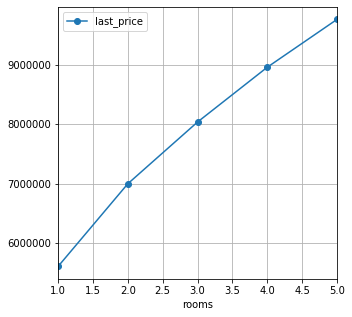

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000  0.172752
rooms         0.172752  1.000000 



In [47]:
(
    spb_center.query('(rooms > 0) & (rooms < 7)').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(spb_center.query('(rooms > 0) & (rooms < 7)').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

Зависимость цены от этажа:

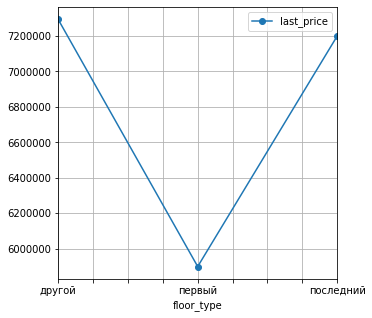

In [48]:
(
    spb_center.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

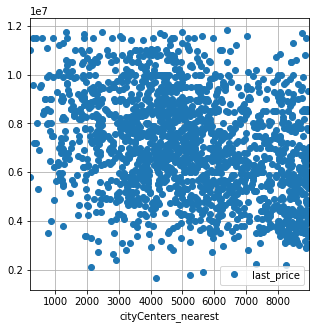

Корреляция цены и удалённости от центра: 

                     cityCenters_nearest  last_price
cityCenters_nearest             1.000000    0.306924
last_price                      0.306924    1.000000 



In [49]:
(
    spb_center.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(spb_center.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr(),'\n')

Зависимость цены от м2:

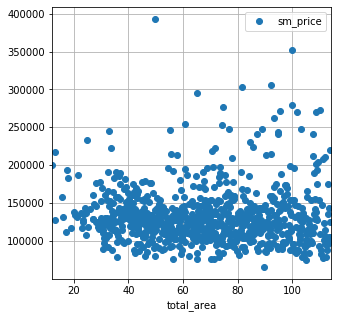

Корреляция цены за квадрат и площади: 

            sm_price  total_area
sm_price     1.00000     0.01833
total_area   0.01833     1.00000 



In [50]:
(
    spb_center.pivot_table(index='total_area', values='sm_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат и площади:','\n')
print(spb_center.pivot_table(index='floor', values=['total_area', 'sm_price']).corr(),'\n')

Зависимость м2 от кол-ва комнат:

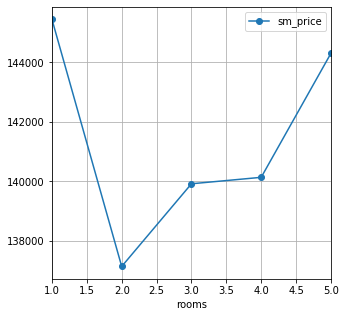

Корреляция цены за квадрат и числа комнат: 

             rooms  sm_price
rooms     1.000000  0.043452
sm_price  0.043452  1.000000 



In [51]:
(
    spb_center.query('rooms > 0').pivot_table(index='rooms', values='sm_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат и числа комнат:','\n')
print(spb_center.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'sm_price']).corr(),'\n')

Зависимость от дня размещения:

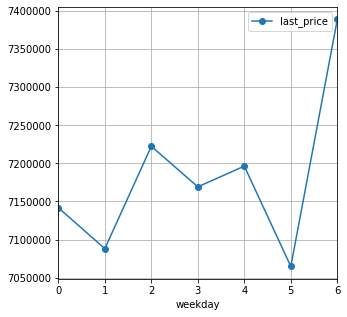

In [52]:
(
    spb_center.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Зависимость от месяца размещения:

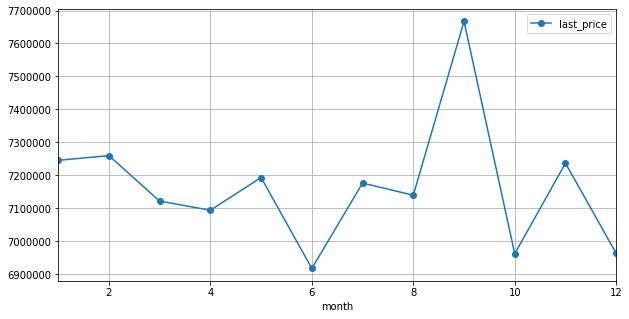

In [53]:
(
    spb_center.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()

Зависимость от года размещения:

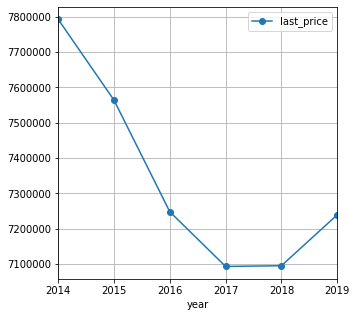

In [54]:
(
    spb_center.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Вывод
- В центре СПБ квартиры больше, потолки выше, 
- Интересно заметить: соотношение одномнатных кваритир в центре меньше чем в общем по городу, зато большая часть 4-5 комнатных квартр находится в центре
- Зависимость цены квартиры от числа комнат в центре похожа на общую по городу
- С качеством крыш в центре лучше, поэтому последние этажи так же ценятся как и остальные, кроме первого конечно)
- В центре есть очень дорогие однокомнатные квартиры
- Как бы странно не звучало: но в центра СПБ нет особой зависимости стоимости от расстояния до географической точки "центра", всё дорого)
- Другое распредение по дням недели и месяцам, большой приток в вс и активный сезон осенью.
- По годам: у кого были деньги - постарались сложить их недвижимость в центре города, поэтому появился рост и плавный спад, а потои опять очень мягкий подъем.

## Общий вывод

Данные были с кучей пропусков, шумов мешающих нам окунутся в мир недвижимости Спб и Ленинградской области. 
Была сделана чистка датасета, заполнение пропусков для получения наиболее корректных результатов нашего иследования.
По итогам выяснилось - что центр Санкт-петербурга лучше остальных, и квартиры больше, и потолки выше, а как любят последние этажи - обзваидуются в пригородах СПБ. 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод